In [1]:
import pandas as pd
import seaborn as sns #0.13.2
import matplotlib.pyplot as plt # 3.8.3
import numpy as np

In [3]:
data = pd.read_csv("data/input/input_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
print("Data does not have any null values")
data.isnull().sum()

Data does not have any null values


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
print("Number of Unique Values in each column of the dataset")
data.nunique()

Number of Unique Values in each column of the dataset


step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [8]:
data.rename(columns = {"newbalanceOrig":"newbalanceOrg"}, inplace = True)

In [9]:
data.drop(["nameOrig","nameDest"], axis =1, inplace = True)

In [10]:
data[["amount","oldbalanceOrg","newbalanceOrg","oldbalanceDest","newbalanceDest"]].min()

amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [11]:
data[["amount","oldbalanceOrg","newbalanceOrg","oldbalanceDest","newbalanceDest"]].max()

amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrg     4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

In [12]:
total_amount_data = data.groupby("type")["amount"].sum().reset_index()
total_amount_data.sort_values("amount", ascending = True, inplace = True)

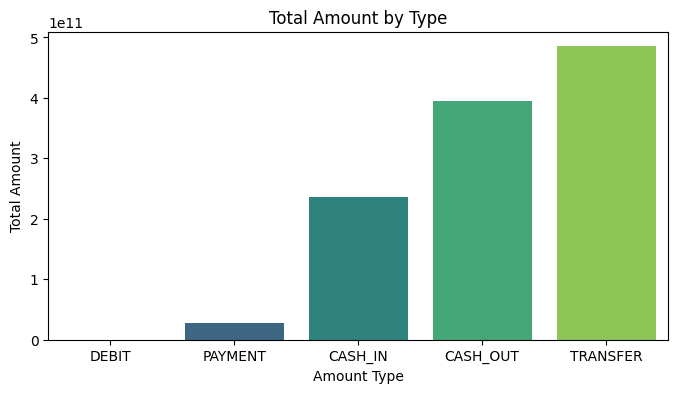

In [13]:
plt.figure(figsize=(8, 4))
sns.barplot(data=total_amount_data, x='type', y='amount', palette='viridis', hue = "type")
plt.xlabel('Amount Type')
plt.ylabel('Total Amount')
plt.title('Total Amount by Type')
plt.show()

In [14]:
data[data["isFraud"] == 1]["type"].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

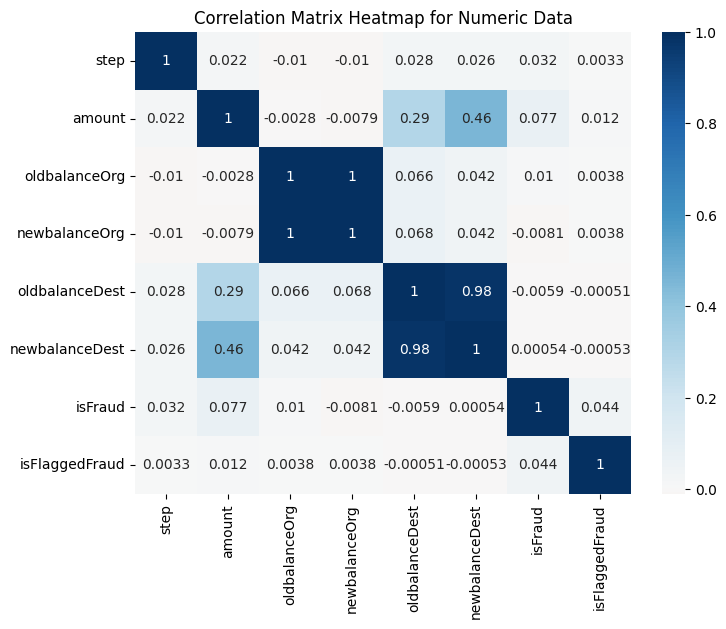

In [15]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center =0)
plt.title('Correlation Matrix Heatmap for Numeric Data')
plt.show()

In [16]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]

In [17]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

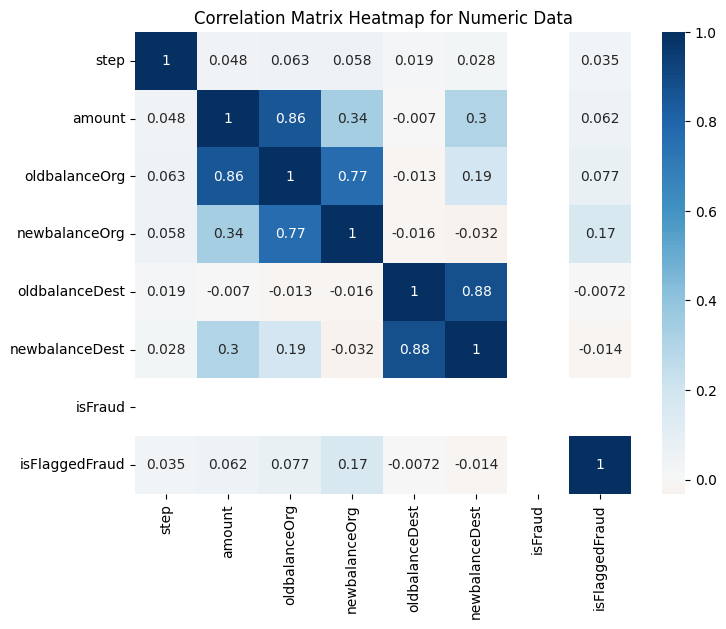

In [18]:
numeric_data = fraud.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center =0)
plt.title('Correlation Matrix Heatmap for Numeric Data')
plt.show()

In [19]:
print('The total number of fraud transaction is {}.'.format(data.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(data.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [20]:
print('Thus in every 773 transaction there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Thus in every 773 transaction there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $12056415427.


In [21]:
piedata = fraud.groupby(['isFlaggedFraud']).sum()

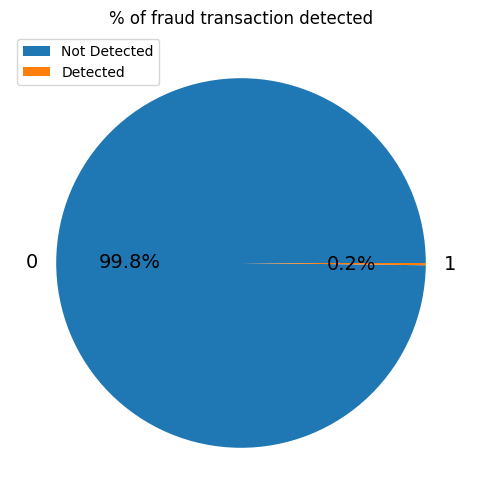

In [22]:
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()


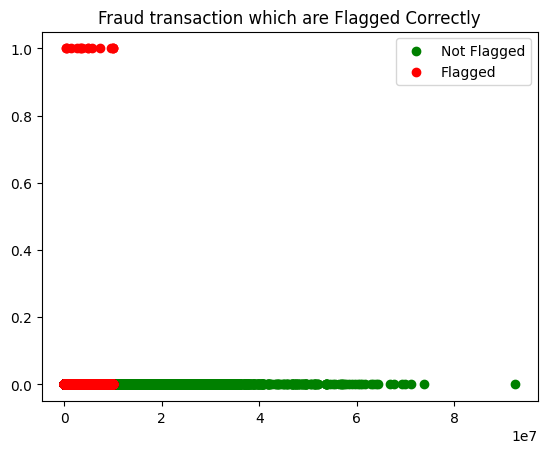

In [23]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.set_title("Fraud transaction which are Flagged Correctly")
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

In [24]:
data = data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,
                                            'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

/var/folders/g9/lb5pmg2x339cysl1j3dl07y40000gn/T/ipykernel_4679/3174118859.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,


In [25]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,2,181.00,181.00,0.00,0.00,0.00,1,0
3,1,3,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,3,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,2,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,3,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,2,850002.52,850002.52,0.00,0.00,0.00,1,0


In [26]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [27]:
data.drop(['isFlaggedFraud'],axis=1,inplace=True)

In [28]:
X = data.drop(['isFraud'],axis=1)
y = data[['isFraud']]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score

In [30]:
clf = RandomForestClassifier(n_estimators=15)
probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

NameError: name 'train_X' is not defined

In [108]:
print(average_precision_score(test_y,probabilities))

0.7697384476351382
